<a href="https://colab.research.google.com/github/yahdiindrawan/StockMarketPrediction-SVR/blob/main/StockMarketPrediction_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [2]:
def generate_data(index_saham, start, end):
    data_all = pandas_datareader.data.DataReader(index_saham, 'yahoo', start,end)
    data_all.reset_index(inplace=True)
    x_all = pd.DataFrame(data_all.Date.astype(str).str.split('-').tolist(),columns="year month date".split())
    y_all = data_all.Close
    return x_all, y_all, data_all
start_date = dt.datetime(2014,1,1)
end_date = dt.datetime.now()
x_all, y_all, data_all = generate_data('BBRI.JK', start_date, end_date)
print(y_all)

0       1460.0
1       1450.0
2       1405.0
3       1415.0
4       1435.0
         ...  
1711    3380.0
1712    3290.0
1713    3490.0
1714    3560.0
1715    3600.0
Name: Close, Length: 1716, dtype: float64


In [3]:
def tranformasi_data(x_all, x_tr):
    scaler = StandardScaler()
    scaler.fit(x_all)
    x_all_tr = scaler.transform(x_tr)
    return x_all_tr


In [4]:
x_all

,year,month,date
0,2014,01,02
1,2014,01,03
2,2014,01,06
3,2014,01,07
4,2014,01,08
...,...,...,...
1711,2020,11,03
1712,2020,11,04
1713,2020,11,05
1714,2020,11,06


In [5]:
x_all_tr = tranformasi_data(x_all, x_all)
x_all_tr

array([[-1.5115864 , -1.58476044, -1.56343447],
       [-1.5115864 , -1.58476044, -1.44892941],
       [-1.5115864 , -1.58476044, -1.10541423],
       ...,
       [ 1.55145111,  1.34599601, -1.21991929],
       [ 1.55145111,  1.34599601, -1.10541423],
       [ 1.55145111,  1.34599601, -0.76189905]])

In [6]:
def model(x_all_tr, y_all):
    svr = SVR(kernel='rbf', C=1e3, gamma='auto')
    svr.fit(x_all_tr, y_all)
    y_pred = svr.predict(x_all_tr)
    return y_pred, svr
y_pred, svr = model(x_all_tr, y_all)


In [7]:
svr

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [8]:
y_pred

array([1743.60840952, 1720.14997821, 1668.20894646, ..., 3490.10021771,
       3506.31319606, 3543.64820288])

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MSE: {0:.3f}'.format(mean_squared_error(y_all, y_pred)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_all, y_pred)))
print('R^2: {0:.3f}'.format(r2_score(y_all, y_pred)))

MSE: 85592.579
MAE: 200.887
R^2: 0.861


In [12]:
prediksi_tanggal = '2020-11-06'
y, m, d = prediksi_tanggal.split('-')
c = [[y, m, d]]
c_tr = tranformasi_data(x_all, c)
print(svr.predict(c_tr))

[3506.31319606]


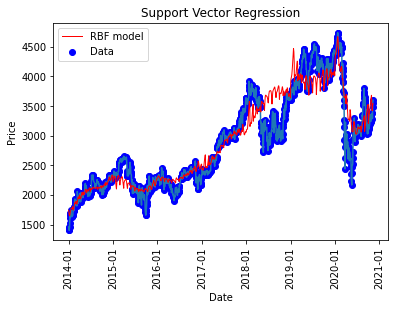

In [13]:
def plot(y_pred, data_all):
    fig, ax1 = plt.subplots()
    plt.plot(data_all.Date, data_all.Close)
    monthyearFmt = mdates.DateFormatter('%Y-%m')
    ax1.xaxis.set_major_formatter(monthyearFmt)
    _ = plt.xticks(rotation=90)
    plt.plot(data_all.Date, y_pred, c='r', label='RBF model', linewidth=1)
    plt.scatter(data_all.Date, data_all.Close, c='b', label='Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
plot(y_pred, data_all)